In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [29]:
df = pd.read_csv('restaurant-1-orders.csv')

In [30]:
df

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6
...,...,...,...,...,...,...
74813,2518,18/05/2016 18:53,House Red wine 75cl,2,17.95,7
74814,2503,14/05/2016 19:28,House Red wine 75cl,2,17.95,6
74815,2467,10/05/2016 13:18,House Red wine 75cl,2,17.95,9
74816,2249,07/04/2016 19:04,House white wine 75cl,1,17.95,6


In [31]:
dfd = df.drop_duplicates(subset=['Item Name'])

In [32]:
df.drop(['Order Number', 'Quantity', 'Product Price', 'Total products'], axis=1, inplace=True)
dfd.drop(['Order Number','Order Date', 'Quantity', 'Total products'], axis=1, inplace=True)

/var/folders/sz/4dnyt_zd7_v7g39gxc4lz3000000gn/T/ipykernel_34253/3180632381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd.drop(['Order Number','Order Date', 'Quantity', 'Total products'], axis=1, inplace=True)


In [33]:
df = df.groupby('Order Date', as_index=False).agg(
    {'Item Name': lambda x: ', '.join(x)}
)

In [34]:
df

,Order Date,Item Name
0,01/01/2017 17:31,"Mango Chutney, Mint Sauce, Plain Naan, Vindalo..."
1,01/01/2017 17:38,"Mango Chutney, Mint Sauce, Plain Naan, Vindalo..."
2,01/01/2017 17:51,"Plain Naan, Pilau Rice, Raitha, Masala Sauce, ..."
3,01/01/2017 18:20,"Mango Chutney, Onion Chutney, Mint Sauce, Plai..."
4,01/01/2017 18:28,"Mango Chutney, Mint Sauce, Plain Papadum, Chap..."
...,...,...
13076,31/12/2018 19:37,"Plain Rice, Paratha, Garlic Naan, Onion Bhajee..."
13077,31/12/2018 20:14,"Peshwari Naan, Saag Rice, Mixed Starter, Chick..."
13078,31/12/2018 20:54,"Mango Chutney, Mint Sauce, Onion Chutney, Red ..."
13079,31/12/2018 21:13,"Mango Chutney, Plain Naan, Sheek Kebab, Bombay..."


In [44]:
df.loc[df['Order Date'] == '02/10/2015 17:29'].index

Index([841], dtype='int64')

In [35]:
dfd.reset_index(drop=True, inplace=True)

In [58]:
dfd.head(10)

,Item Name,Product Price
0,Plain Papadum,0.80
1,King Prawn Balti,12.95
2,Garlic Naan,2.95
3,Mushroom Rice,3.95
4,Paneer Tikka Masala,8.95
5,Mango Chutney,0.50
6,Plain Naan,2.60
7,Tandoori Chicken (1/4),4.95
8,Vindaloo - Lamb,7.95
9,Chapati,1.95


In [54]:
df.iloc[0,1]

'Mango Chutney, Mint Sauce, Plain Naan, Vindaloo, Chicken Tikka (Main), Sheek Kebab (Main), Lamb Karahi, Paneer Shaslick, Lamb Tikka Biryani'

In [59]:
df['Item Name'] = df['Item Name'].apply(lambda x: [dfd.loc[dfd['Item Name'] == item].index[0].astype(int) for item in x.split(", ")])
df

,Order Date,Item Name
0,01/01/2017 17:31,"[5, 32, 6, 149, 39, 165, 158, 197, 214]"
1,01/01/2017 17:38,"[5, 32, 6, 149, 39, 165, 158, 197, 214]"
2,01/01/2017 17:51,"[6, 20, 90, 52, 42, 89, 12, 35, 137, 13, 163, ..."
3,01/01/2017 18:20,"[5, 38, 32, 0, 2, 3, 36, 11, 183, 65]"
4,01/01/2017 18:28,"[5, 32, 0, 9, 36, 120, 190, 81]"
...,...,...
13076,31/12/2018 19:37,"[41, 115, 2, 36, 35, 100, 69, 40, 54]"
13077,31/12/2018 20:14,"[19, 104, 49, 23, 94]"
13078,31/12/2018 20:54,"[5, 32, 38, 17, 0, 6, 20, 16, 40, 57]"
13079,31/12/2018 21:13,"[5, 6, 37, 35, 48]"


### Complimentary Recommendations

In [135]:
G = nx.empty_graph()
print(G)

Graph with 0 nodes and 0 edges


In [136]:

# Process each row in the DataFrame
for _, row in df.iterrows():
    current_items = row["Item Name"]  # Get the list of items in the row

    # Fully connect all nodes in the current row
    for i, node1 in enumerate(current_items):
        for node2 in current_items[i+1:]:
            # Check if the edge already exists
            if G.has_edge(node1, node2):
                # Increment the weight of the edge
                G[node1][node2]['weight'] += 1
            else:
                # Add a new edge with weight 1
                G.add_edge(node1, node2, weight=1)

    # # Connect current row's nodes to all existing nodes in the graph
    # for node in current_items:
    #     if node not in G.nodes:
    #         G.add_node(node)  # Add new node
    #     for existing_node in G.nodes:
    #         if node != existing_node:  # Avoid self-loops
    #             # Check if the edge already exists
    #             if G.has_edge(node, existing_node):
    #                 # Increment the weight of the edge
    #                 G[node][existing_node]['weight'] += 1
    #             else:
    #                 # Add a new edge with weight 1
    #                 G.add_edge(node, existing_node, weight=1)

# Display the graph info
print(G)

Graph with 248 nodes and 17796 edges


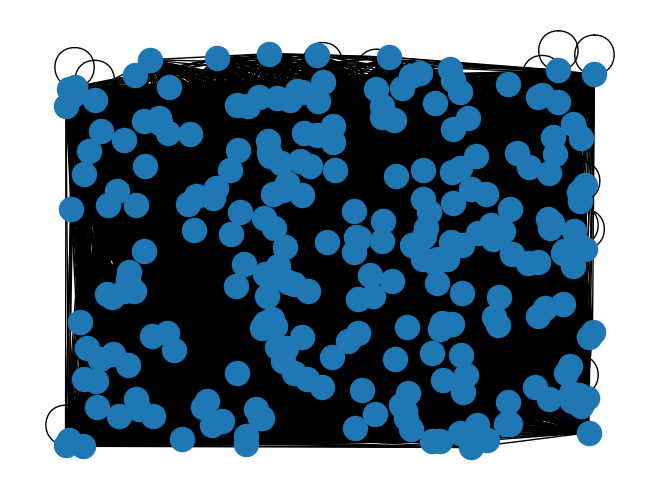

In [137]:
nx.draw_random(G)

In [138]:
self_loops = list(nx.selfloop_edges(G))
print(f"Number of self-loops: {len(self_loops)}")
if len(self_loops) > 0:
    print(f"Self-loops: {self_loops}")

Number of self-loops: 60
Self-loops: [(np.int64(5), np.int64(5)), (np.int64(32), np.int64(32)), (np.int64(6), np.int64(6)), (np.int64(149), np.int64(149)), (np.int64(20), np.int64(20)), (np.int64(52), np.int64(52)), (np.int64(42), np.int64(42)), (np.int64(12), np.int64(12)), (np.int64(35), np.int64(35)), (np.int64(38), np.int64(38)), (np.int64(0), np.int64(0)), (np.int64(2), np.int64(2)), (np.int64(3), np.int64(3)), (np.int64(36), np.int64(36)), (np.int64(11), np.int64(11)), (np.int64(183), np.int64(183)), (np.int64(9), np.int64(9)), (np.int64(41), np.int64(41)), (np.int64(29), np.int64(29)), (np.int64(179), np.int64(179)), (np.int64(16), np.int64(16)), (np.int64(48), np.int64(48)), (np.int64(17), np.int64(17)), (np.int64(104), np.int64(104)), (np.int64(180), np.int64(180)), (np.int64(92), np.int64(92)), (np.int64(31), np.int64(31)), (np.int64(43), np.int64(43)), (np.int64(115), np.int64(115)), (np.int64(100), np.int64(100)), (np.int64(181), np.int64(181)), (np.int64(147), np.int64(147

In [139]:
G.remove_edges_from(nx.selfloop_edges(G))

In [140]:
print(G)

Graph with 248 nodes and 17736 edges


In [141]:
def get_top_k_adjacent_nodes(graph, node, k):
    """
    Get the top k adjacent nodes with the highest edge weights for a given node.

    Args:
        graph (nx.Graph): The graph object.
        node: The node for which to find the top k neighbors.
        k (int): The number of top neighbors to retrieve.

    Returns:
        list: A list of tuples (neighbor, weight) sorted by weight in descending order.
    """
    if node not in graph:
        print(f"Node {node} is not in the graph.")
        return []
    
    # Get all neighbors of the node with their weights
    neighbors = [(neighbor, graph[node][neighbor]['weight']) for neighbor in graph.neighbors(node)]
    
    # Sort the neighbors by weight in descending order
    sorted_neighbors = sorted(neighbors, key=lambda x: x[1], reverse=True)
    
    # Return the top k neighbors
    return sorted_neighbors[:k]



In [162]:
# Example usage
node = 5  # The node to query
k = 10  # Top k neighbors
top_k_neighbors = get_top_k_adjacent_nodes(G, node, k)
print(f"Top {k} neighbors of node {node}: {top_k_neighbors}")

Top 10 neighbors of node 5: [(np.int64(0), 1559), (np.int64(20), 1037), (np.int64(6), 748), (np.int64(32), 743), (np.int64(38), 598), (np.int64(36), 570), (np.int64(2), 489), (np.int64(23), 479), (np.int64(41), 430), (np.int64(35), 426)]


In [168]:
dfd.iloc[35]

Item Name        Bombay Aloo
Product Price           5.95
Name: 35, dtype: object

### Alternative Recommendations

In [172]:
from sklearn.neighbors import NearestNeighbors

In [169]:
dfd

,Item Name,Product Price
0,Plain Papadum,0.80
1,King Prawn Balti,12.95
2,Garlic Naan,2.95
3,Mushroom Rice,3.95
4,Paneer Tikka Masala,8.95
...,...,...
243,Mushroom - King Prawn,12.95
244,King Prawn Karahi,12.95
245,Methi - King Prawn,12.95
246,Kurma,12.95


In [176]:
# Extract prices as the feature for KNN
prices = dfd["Product Price"].values.reshape(-1, 1)

# Initialize the KNN model
k = 5
knn = NearestNeighbors(n_neighbors=k, metric='euclidean')
knn.fit(prices)

# Function to find k nearest neighbors for a given item
def find_knn(item_name, df, knn_model):
    # Get the price of the given item
    item_price = df.loc[df["Item Name"] == item_name, "Product Price"].values[0].reshape(-1, 1)
    
    # Find k nearest neighbors
    distances, indices = knn_model.kneighbors(item_price)
    
    # Get the corresponding items and their distances
    neighbors = [(df.iloc[idx]["Item Name"], df.iloc[idx]["Product Price"], dist) 
                 for idx, dist in zip(indices[0], distances[0])]
    
    return neighbors



In [178]:
# Example usage
k = 5  # Number of neighbors
item_to_query = "Tandoori Chicken"
result = find_knn(item_to_query, dfd, knn)

# Print results
print(f"Top {k} items with relatable prices to '{item_to_query}':")
for neighbor in result:
    print(f"Item: {neighbor[0]}, Price: {neighbor[1]}, Distance: {neighbor[2]:.2f}")

Top 5 items with relatable prices to 'Tandoori Chicken':
Item: Korma - Chicken, Price: 8.95, Distance: 0.00
Item: Tandoori Chicken Masala, Price: 8.95, Distance: 0.00
Item: Lamb Tikka Chilli Masala, Price: 8.95, Distance: 0.00
Item: Paneer Tikka Masala, Price: 8.95, Distance: 0.00
Item: Chicken Tikka (Main), Price: 8.95, Distance: 0.00


In [180]:
prices.shape

(248, 1)